In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [2]:
#dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
#tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='C:\\Users\\BHUMIKA\\Downloads',untar=True)

In [3]:
data_direc="C:\\Users\\BHUMIKA\\Downloads\\datasets\\flower_photos"

In [4]:

import pathlib
data_dir=pathlib.Path(data_direc)
len(list(data_dir.glob('*/*.jpg')))

474

In [5]:
roses=list(data_dir.glob('roses/*.jpg'))

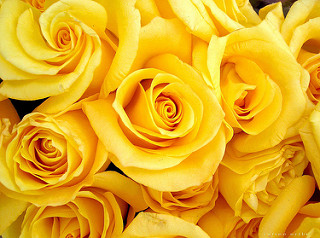

In [6]:
PIL.Image.open(roses[5])

In [7]:
flowers_image_dir ={
    'roses':list(data_dir.glob('roses/*.jpg')),
    'daisy':list(data_dir.glob("daisy/*.jpg")),
    'dandelion':list(data_dir.glob("dandelion/*.jpg")),
    'sunflowers':list(data_dir.glob("sunflowers/*.jpg")),
    'tulips':list(data_dir.glob("tulips/*.jpg"))
}


In [8]:
flowers_labels ={'daisy':0,
'dandelion':1, 
'roses':2,
'sunflowers':3,
'tulips':4
}

In [9]:
img=cv2.imread(str(flowers_image_dir['roses'][0]))

In [10]:
img.shape

(240, 320, 3)

In [11]:
img=cv2.imread(str(flowers_image_dir['roses'][1]))
img.shape

(240, 180, 3)

In [12]:
#here x will be our image and y will be flower name
x, y= [], []
for flower_name in flowers_image_dir:
    for images in flowers_image_dir[flower_name]:
        img=cv2.imread(str(images))
        resized=cv2.resize(img,(240, 320))
        resized=tf.cast(resized, tf.float32)
        x.append(resized)    
        y.append(flowers_labels[flower_name])

In [13]:
x=np.array(x)
y=np.array(y)

In [14]:
x.dtype

dtype('float32')

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1) 

In [16]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [17]:
x_train.dtype

dtype('float32')

In [29]:
model =keras.Sequential ([
    keras.layers.Conv2D(16,3, padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3, padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(5,activation='sigmoid')
])
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
           )

In [30]:
model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
11/11 [==============================] - 21s 2s/step - loss: 13.5601 - accuracy: 0.2094
Epoch 2/5
11/11 [==============================] - 19s 2s/step - loss: 1.7960 - accuracy: 0.2509
Epoch 3/5
11/11 [==============================] - 20s 2s/step - loss: 1.3097 - accuracy: 0.4574
Epoch 4/5
11/11 [==============================] - 21s 2s/step - loss: 0.8954 - accuracy: 0.7010
Epoch 5/5
11/11 [==============================] - 19s 2s/step - loss: 0.5880 - accuracy: 0.8418


In [31]:
model.evaluate(x_test_scaled,y_test)

5/5 [==============================] - 3s 476ms/step - loss: 1.3900 - accuracy: 0.5455


[1.3900078535079956, 0.5454545617103577]

In [33]:
yp=model.predict(x_test_scaled)

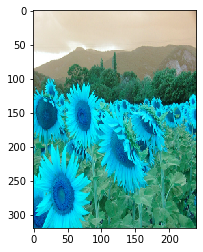

In [59]:
plt.imshow(x_test_scaled[13])

In [40]:
yp= [np.argmax(x) for x in yp]

In [68]:
yp[7]

1

In [67]:
y_test[7]

3

In [85]:
data_augmentation = keras.Sequential ([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.3)
])

In [86]:
model =keras.Sequential ([
    data_augmentation,
    keras.layers.Conv2D(16,3, padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3, padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3, padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(5,activation='sigmoid')
])
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
           )

In [87]:
model.fit(x_train_scaled,y_train,epochs=15)

Epoch 1/15
11/11 [==============================] - 29s 3s/step - loss: 1.8616 - accuracy: 0.2128
Epoch 2/15
11/11 [==============================] - 28s 3s/step - loss: 1.5432 - accuracy: 0.3339
Epoch 3/15
11/11 [==============================] - 28s 2s/step - loss: 1.3621 - accuracy: 0.3701
Epoch 4/15
11/11 [==============================] - 26s 2s/step - loss: 1.2779 - accuracy: 0.4377
Epoch 5/15
11/11 [==============================] - 25s 2s/step - loss: 1.1464 - accuracy: 0.5089
Epoch 6/15
11/11 [==============================] - 25s 2s/step - loss: 1.0918 - accuracy: 0.5078
Epoch 7/15
11/11 [==============================] - 25s 2s/step - loss: 1.0090 - accuracy: 0.5475
Epoch 8/15
11/11 [==============================] - 25s 2s/step - loss: 1.0580 - accuracy: 0.5420
Epoch 9/15
11/11 [==============================] - 25s 2s/step - loss: 1.0399 - accuracy: 0.5619
Epoch 10/15
11/11 [==============================] - 28s 3s/step - loss: 0.9747 - accuracy: 0.5759
Epoch 11/15
11/11 [

In [88]:
model.evaluate(x_test_scaled,y_test)

5/5 [==============================] - 3s 503ms/step - loss: 1.0561 - accuracy: 0.5594


[1.0560823678970337, 0.559440553188324]